# 手写数字识别器

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset,DataLoader,TensorDataset
from torchvision import datasets,transforms
import torch.optim as optim
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [4]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/deeplearninghomework")
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/deeplearninghomework


下载数据集，处理数据集

In [5]:
train_data=datasets.MNIST(root='./',
            train=True,transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.1307,],[0.3081,])
            ]),
            download=True
            )
train_loader=DataLoader(dataset=train_data,batch_size=64,shuffle=True)

test_data=datasets.MNIST(root='./',
            train=False,transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.1307,],[0.3081,])
            ])                      
            )
test_loader=DataLoader(dataset=test_data,batch_size=64,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



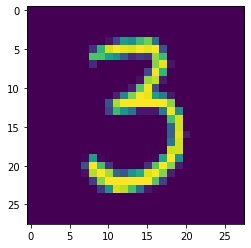

label: 3


In [7]:
img=train_data[50][0].numpy()
label=train_data[50][1]
plt.imshow(img[0,:])
plt.show()
print("label:",label)

构建网络

In [9]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(1,4,5,padding=2)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(4,8,5,padding=2)
        self.fc1=nn.Linear((28*28)//(4*4)*8,512)
        self.fc2=nn.Linear(512,10)
        
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.pool(x)
        
        x=self.conv2(x)
        x=F.relu(x)
        x=self.pool(x)
        
        x=x.view(-1,(28*28)//(4*4)*8)
        x=self.fc1(x)
        x=F.relu(x)
        
        x=F.dropout(x,training=self.training)
        x=self.fc2(x)
        return x
        
    def feature_maps(self,x):
        map1=self.conv1(x)
        map1=F.relu(map1)
        map2=self.pool(map1)
        map2=self.conv2(map2)
        map2=F.relu(map2)
        return(map1,map2)

In [10]:
net=model()
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [11]:
for epoch in range(20):
  for i,data in enumerate(train_loader):
    x,y=data
    net.train()
    pred=net(x)
    loss=loss_fn(pred,y)
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    
  print(loss)

tensor(0.3520, grad_fn=<NllLossBackward0>)
tensor(0.1329, grad_fn=<NllLossBackward0>)
tensor(0.0491, grad_fn=<NllLossBackward0>)
tensor(0.0295, grad_fn=<NllLossBackward0>)
tensor(0.0511, grad_fn=<NllLossBackward0>)
tensor(0.0321, grad_fn=<NllLossBackward0>)
tensor(0.0893, grad_fn=<NllLossBackward0>)
tensor(0.0937, grad_fn=<NllLossBackward0>)
tensor(0.0357, grad_fn=<NllLossBackward0>)
tensor(0.0875, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0196, grad_fn=<NllLossBackward0>)
tensor(0.1891, grad_fn=<NllLossBackward0>)
tensor(0.0322, grad_fn=<NllLossBackward0>)
tensor(0.0181, grad_fn=<NllLossBackward0>)
tensor(0.0217, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0277, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.1624, grad_fn=<NllLossBackward0>)


In [12]:
rights=0
length=0

def rightness(pred,labels):
  pred=torch.max(pred.data, 1)[1]
  rights=pred.eq(labels.data.view_as(pred)).sum()
  return rights,len(labels)

for i,data in enumerate(test_loader):
  x,y=data
  net.eval()#dropout 关闭
  pred=net(x)
  rights=rights+rightness(pred,y)[0]
  length=length+rightness(pred,y)[1]
    
print(rights,length,rights/length)

tensor(9881) 10000 tensor(0.9881)


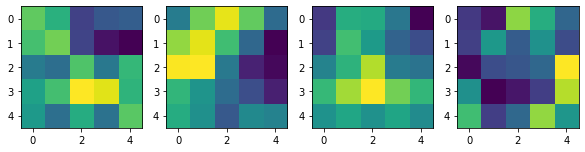

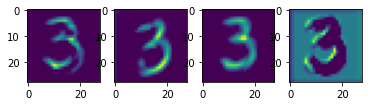

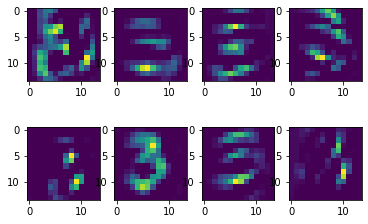

In [13]:
plt.figure(figsize=(10,8))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(net.conv1.weight.data.numpy()[i,0,:])
plt.show()

x=train_data[50][0].unsqueeze(0)
map1,map2=net.feature_maps(x)
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(map1[0,i,:].data.numpy())
plt.show()

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(map2[0,i,:].data.numpy())
plt.show()